In [ ]:
import pandas as pd
import datetime
from datetime import datetime as dt


In [ ]:
data = pd.read_csv("MetroPT3(AirCompressor).csv")

In [ ]:
# !unzip metropt+3+dataset.zip

In [ ]:
data.shape

(1516948, 17)

In [ ]:
data.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [ ]:
data = data[['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses']]

In [ ]:
def date_convert(x):

  # return dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')
  return dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')


data['timestamp_hour'] = data['timestamp'].apply(date_convert)

#### Consolidate on date

In [ ]:
data_consolidated = data.groupby(['timestamp_hour']).median().copy()

<ipython-input-498-6e4115881510>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_consolidated = data.groupby(['timestamp_hour']).median().copy()


In [ ]:
data_consolidated.shape

# Data Count : 4416

(4416, 15)

In [ ]:
data_consolidated['timestamp_hour'] = data_consolidated.index

In [ ]:
data_consolidated = data_consolidated.reset_index(drop=True).copy()

In [ ]:
data_consolidated.shape

(4416, 16)

In [ ]:
data_consolidated['timestamp_hour']

0       2020-02-01 00
1       2020-02-01 01
2       2020-02-01 02
3       2020-02-01 03
4       2020-02-01 04
            ...      
4411    2020-08-31 19
4412    2020-08-31 20
4413    2020-09-01 00
4414    2020-09-01 02
4415    2020-09-01 03
Name: timestamp_hour, Length: 4416, dtype: object

In [ ]:
data_consolidated['Pressure_switch'].value_counts()

1.0    4416
Name: Pressure_switch, dtype: int64

In [ ]:
data_plot = data_consolidated[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Oil_level', 'Caudal_impulses']].reset_index(drop=True).copy()

In [ ]:
# data_plot['Pressure_switch']

In [ ]:
data_plot.corr()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Oil_level,Caudal_impulses
TP2,1.000000,-0.346180,-0.968243,0.759446,-0.346227,0.382461,0.582368,-0.970851,0.927382,-0.547109,-0.927382,0.123130,0.077453,0.046763
TP3,-0.346180,1.000000,0.510322,-0.291512,0.999986,0.123613,-0.100443,0.472494,-0.408039,0.365054,0.408039,-0.663859,-0.098141,-0.130614
H1,-0.968243,0.510322,1.000000,-0.727130,0.510389,-0.330953,-0.564193,0.994059,-0.939698,0.564731,0.939698,-0.282485,-0.089335,-0.065034
DV_pressure,0.759446,-0.291512,-0.727130,1.000000,-0.291154,0.403949,0.437582,-0.732032,0.696584,-0.585677,-0.696584,0.007743,0.059351,0.046246
Reservoirs,-0.346227,0.999986,0.510389,-0.291154,1.000000,0.124240,-0.100605,0.472619,-0.408267,0.364990,0.408267,-0.664314,-0.098173,-0.128885
Oil_temperature,0.382461,0.123613,-0.330953,0.403949,0.124240,1.000000,0.584849,-0.329768,0.337069,-0.221761,-0.337069,-0.125695,-0.173403,-0.085560
Motor_current,0.582368,-0.100443,-0.564193,0.437582,-0.100605,0.584849,1.000000,-0.572625,0.582686,-0.324782,-0.582686,0.095253,-0.059642,-0.095021
COMP,-0.970851,0.472494,0.994059,-0.732032,0.472619,-0.329768,-0.572625,1.000000,-0.951774,0.568559,0.951774,-0.284350,-0.082859,-0.049814
DV_eletric,0.927382,-0.408039,-0.939698,0.696584,-0.408267,0.337069,0.582686,-0.951774,1.000000,-0.541147,-1.000000,0.270641,0.000754,-0.051699
Towers,-0.547109,0.365054,0.564731,-0.585677,0.364990,-0.221761,-0.324782,0.568559,-0.541147,1.000000,0.541147,-0.228255,-0.047024,-0.030466


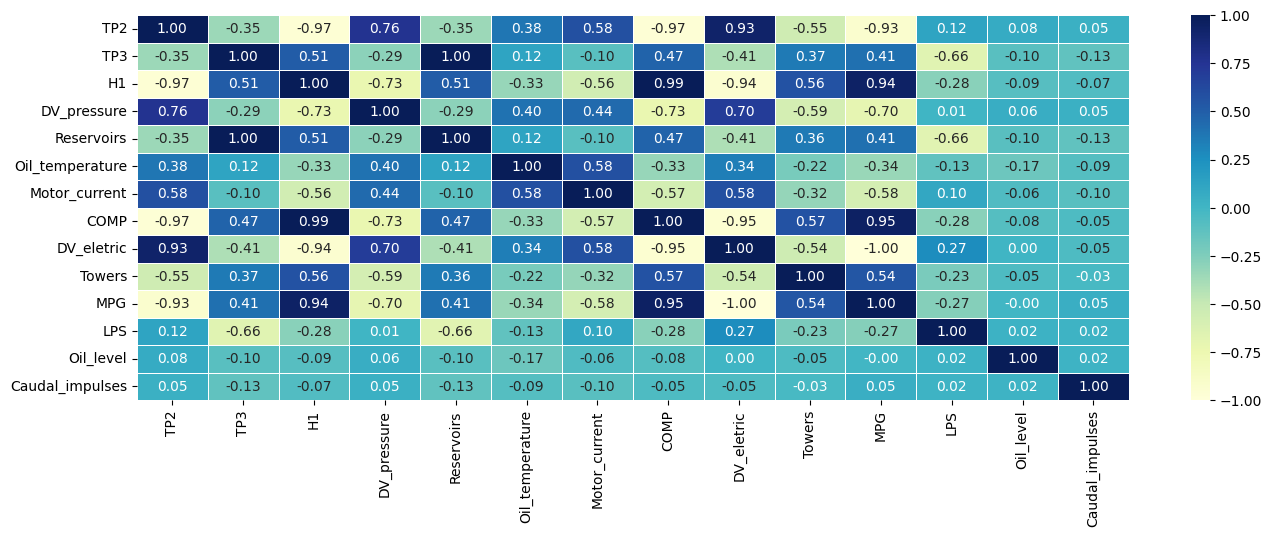

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize = (16,5))
dataplot = sb.heatmap(data_plot.corr(), cmap="YlGnBu", annot=True,linewidths=0.5,fmt='.2f')
plt.show()


In [ ]:
def get_date(x):

  return dt.strptime(x,'%Y-%m-%d %H').strftime('%Y-%m-%d')


data_consolidated['timestamp_date'] = data_consolidated['timestamp_hour'].apply(get_date)

In [ ]:
data_consolidated['timestamp_date']

0       2020-02-01
1       2020-02-01
2       2020-02-01
3       2020-02-01
4       2020-02-01
           ...    
4411    2020-08-31
4412    2020-08-31
4413    2020-09-01
4414    2020-09-01
4415    2020-09-01
Name: timestamp_date, Length: 4416, dtype: object

#### Bad Pool , Good Pool Data Segregation

In [ ]:
bad_pool_train_start_date = ['2020-04-18','2020-05-29']
# bad_pool_validation_start_date = ['2020-06-05']
bad_pool_test_start_date = ['2020-07-15']


good_pool_forward_train_start_date = ['2020-04-23','2020-06-4']
# good_pool_forward_validation_start_date = ['2020-06-05']
good_pool_forward_test_start_date = ['2020-07-20']

In [ ]:
bad_pool_timeframe = 1
good_pool_timeframe = 3
buffer_days = 5

In [ ]:
def get_past_n_days(x,numdays):

  x_date = dt.strptime(x,'%Y-%m-%d')
  date_list = [ (x_date - datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(numdays)]

  return date_list


def get_next_n_days(x,numdays):

  x_date = dt.strptime(x,'%Y-%m-%d')
  date_list = [ (x_date + datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(numdays)]

  return date_list

#### Extract Train Bad Pool Data

In [ ]:
final_bad_pool_train_dataframe = pd.DataFrame()
good_pool_train_start_date = []
for failure_date in bad_pool_train_start_date:

  print("-------------------------------------")
  date_list = get_past_n_days(failure_date,bad_pool_timeframe)
  print(date_list)
  good_pool_train_start_date.append( (dt.strptime(date_list[-1],'%Y-%m-%d')-
                                    datetime.timedelta(days=1)).strftime('%Y-%m-%d'))

  bad_pool_data = data_consolidated[data_consolidated['timestamp_date'].isin(date_list)]
  bad_pool_data = bad_pool_data.reset_index(drop=True)
  bad_pool_data['label'] = 1
  bad_pool_data = bad_pool_data.copy()
  print("shape of dataframe : ",bad_pool_data.shape)

  final_bad_pool_train_dataframe = final_bad_pool_train_dataframe.append(bad_pool_data, ignore_index=True)


print(final_bad_pool_train_dataframe.shape)

-------------------------------------
['2020-04-18']
shape of dataframe :  (24, 18)
-------------------------------------
['2020-05-29']
shape of dataframe :  (23, 18)
(47, 18)


<ipython-input-514-c28a6411e7e2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_bad_pool_train_dataframe = final_bad_pool_train_dataframe.append(bad_pool_data, ignore_index=True)
<ipython-input-514-c28a6411e7e2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_bad_pool_train_dataframe = final_bad_pool_train_dataframe.append(bad_pool_data, ignore_index=True)


#### Extract Train Good Pool Data

In [ ]:
good_pool_train_start_date

['2020-04-17', '2020-05-28']

In [ ]:

final_good_pool_train_dataframe = pd.DataFrame()

#----------------------- Backward
for good_date in good_pool_train_start_date:

  print("-------------------------------------")
  date_list = get_past_n_days(good_date,good_pool_timeframe)
  print(date_list)

  good_pool_data = data_consolidated[data_consolidated['timestamp_date'].isin(date_list)]
  good_pool_data = good_pool_data.reset_index(drop=True)
  good_pool_data['label'] = 0
  good_pool_data = good_pool_data.copy()
  print("shape of dataframe : ",good_pool_data.shape)

  final_good_pool_train_dataframe = final_good_pool_train_dataframe.append(good_pool_data, ignore_index=True)


print(final_good_pool_train_dataframe.shape)

#----------------------- Forward
print("--------------------------- Forward -------------------------------------------")

for good_date in good_pool_forward_train_start_date:

  print("-------------------------------------")
  date_list = get_next_n_days(good_date,good_pool_timeframe)
  print(date_list)

  good_pool_data = data_consolidated[data_consolidated['timestamp_date'].isin(date_list)]
  good_pool_data = good_pool_data.reset_index(drop=True)
  good_pool_data['label'] = 0
  good_pool_data = good_pool_data.copy()
  print("shape of dataframe : ",good_pool_data.shape)

  final_good_pool_train_dataframe = final_good_pool_train_dataframe.append(good_pool_data, ignore_index=True)


print(final_good_pool_train_dataframe.shape)





-------------------------------------
['2020-04-17', '2020-04-16', '2020-04-15']
shape of dataframe :  (68, 18)
-------------------------------------
['2020-05-28', '2020-05-27', '2020-05-26']
shape of dataframe :  (67, 18)
(135, 18)
--------------------------- Forward -------------------------------------------
-------------------------------------
['2020-04-23', '2020-04-24', '2020-04-25']
shape of dataframe :  (47, 18)
-------------------------------------
['2020-06-04', '2020-06-05', '2020-06-06']
shape of dataframe :  (69, 18)
(251, 18)


<ipython-input-516-8e4ae80211c1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_good_pool_train_dataframe = final_good_pool_train_dataframe.append(good_pool_data, ignore_index=True)
<ipython-input-516-8e4ae80211c1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_good_pool_train_dataframe = final_good_pool_train_dataframe.append(good_pool_data, ignore_index=True)
<ipython-input-516-8e4ae80211c1>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_good_pool_train_dataframe = final_good_pool_train_dataframe.append(good_pool_data, ignore_index=True)
<ipython-input-516-8e4ae80211c1>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

#### Extract Test Bad Pool Data

In [ ]:
final_bad_pool_test_dataframe = pd.DataFrame()
good_pool_test_start_date = []
for failure_date in bad_pool_test_start_date:

  print("-------------------------------------")
  date_list = get_past_n_days(failure_date,bad_pool_timeframe)
  print(date_list)
  good_pool_test_start_date.append( (dt.strptime(date_list[-1],'%Y-%m-%d')-
                                    datetime.timedelta(days=1)).strftime('%Y-%m-%d'))

  bad_pool_data = data_consolidated[data_consolidated['timestamp_date'].isin(date_list)]
  bad_pool_data = bad_pool_data.reset_index(drop=True)
  bad_pool_data['label'] = 1
  bad_pool_data = bad_pool_data.copy()
  print("shape of dataframe : ",bad_pool_data.shape)

  final_bad_pool_test_dataframe = final_bad_pool_test_dataframe.append(bad_pool_data, ignore_index=True)


print(final_bad_pool_test_dataframe.shape)

-------------------------------------
['2020-07-15']
shape of dataframe :  (24, 18)
(24, 18)


<ipython-input-517-bb23d4a5c764>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_bad_pool_test_dataframe = final_bad_pool_test_dataframe.append(bad_pool_data, ignore_index=True)


In [ ]:
good_pool_test_start_date

['2020-07-14']

#### Extract Test Good Pool Data

In [ ]:
good_pool_test_start_date

['2020-07-14']

In [ ]:

final_good_pool_test_dataframe = pd.DataFrame()

#----------------------- Backward
for good_date in good_pool_test_start_date:

  print("-------------------------------------")
  date_list = get_next_n_days(good_date,good_pool_timeframe)
  print(date_list)

  good_pool_data = data_consolidated[data_consolidated['timestamp_date'].isin(date_list)]
  good_pool_data = good_pool_data.reset_index(drop=True)
  good_pool_data['label'] = 0
  good_pool_data = good_pool_data.copy()
  print("shape of dataframe : ",good_pool_data.shape)

  final_good_pool_test_dataframe = final_good_pool_test_dataframe.append(good_pool_data, ignore_index=True)


print(final_good_pool_test_dataframe.shape)

#----------------------- Forward
print("--------------------------- Forward -------------------------------------------")

for good_date in good_pool_forward_test_start_date:

  print("-------------------------------------")
  date_list = get_past_n_days(good_date,good_pool_timeframe)
  print(date_list)

  good_pool_data = data_consolidated[data_consolidated['timestamp_date'].isin(date_list)]
  good_pool_data = good_pool_data.reset_index(drop=True)
  good_pool_data['label'] = 0
  good_pool_data = good_pool_data.copy()
  print("shape of dataframe : ",good_pool_data.shape)

  final_good_pool_test_dataframe = final_good_pool_test_dataframe.append(good_pool_data, ignore_index=True)


print(final_good_pool_test_dataframe.shape)





-------------------------------------
['2020-07-14', '2020-07-15', '2020-07-16']
shape of dataframe :  (59, 18)
(59, 18)
--------------------------- Forward -------------------------------------------
-------------------------------------
['2020-07-20', '2020-07-19', '2020-07-18']
shape of dataframe :  (72, 18)
(131, 18)


<ipython-input-520-f336411e1700>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_good_pool_test_dataframe = final_good_pool_test_dataframe.append(good_pool_data, ignore_index=True)
<ipython-input-520-f336411e1700>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_good_pool_test_dataframe = final_good_pool_test_dataframe.append(good_pool_data, ignore_index=True)


In [ ]:
final_good_pool_test_dataframe.shape, final_bad_pool_test_dataframe.shape

((131, 18), (24, 18))

In [ ]:
final_bad_pool_test_dataframe.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'timestamp_hour',
       'timestamp_date', 'label'],
      dtype='object')

In [ ]:
train_data = pd.DataFrame()

train_data = train_data.append(final_bad_pool_train_dataframe,ignore_index=True)
train_data = train_data.append(final_good_pool_train_dataframe,ignore_index=True)

train_data.shape

<ipython-input-523-1b905d400a36>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(final_bad_pool_train_dataframe,ignore_index=True)
<ipython-input-523-1b905d400a36>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(final_good_pool_train_dataframe,ignore_index=True)


(298, 18)

In [ ]:
test_data = pd.DataFrame()

test_data = test_data.append(final_bad_pool_test_dataframe,ignore_index=True)
test_data = test_data.append(final_good_pool_test_dataframe,ignore_index=True)

test_data.shape

<ipython-input-524-e28e2a063d90>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(final_bad_pool_test_dataframe,ignore_index=True)
<ipython-input-524-e28e2a063d90>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(final_good_pool_test_dataframe,ignore_index=True)


(155, 18)

In [ ]:
train_data.shape, test_data.shape

((298, 18), (155, 18))

In [ ]:
train_data.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'timestamp_hour',
       'timestamp_date', 'label'],
      dtype='object')

In [ ]:
# pd.datetime()

pd.to_datetime(train_data['timestamp_hour'])

0     2020-04-18 00:00:00
1     2020-04-18 01:00:00
2     2020-04-18 02:00:00
3     2020-04-18 03:00:00
4     2020-04-18 04:00:00
              ...        
293   2020-06-06 19:00:00
294   2020-06-06 20:00:00
295   2020-06-06 21:00:00
296   2020-06-06 22:00:00
297   2020-06-06 23:00:00
Name: timestamp_hour, Length: 298, dtype: datetime64[ns]

In [ ]:
train_data['timestamp_hour_dateformat'] = pd.to_datetime(train_data['timestamp_hour'])

train_data = train_data.sort_values(by='timestamp_hour_dateformat').copy()


test_data['timestamp_hour_dateformat'] = pd.to_datetime(test_data['timestamp_hour'])

test_data = test_data.sort_values(by='timestamp_hour_dateformat').copy()



In [ ]:
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature']

In [ ]:
# ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
#        'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
#        'Pressure_switch', 'Oil_level', 'Caudal_impulses']


train_data_features = train_data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature']]
train_data_label = train_data['label']

test_data_features = test_data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature']]

test_data_label = test_data['label']

In [ ]:
test_data

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,timestamp_hour,timestamp_date,label,timestamp_hour_dateformat
24,-0.010,8.924,8.772,-0.018,8.924,63.9500,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-14 00,2020-07-14,0,2020-07-14 00:00:00
25,-0.010,8.872,8.770,-0.018,8.874,63.2500,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-14 01,2020-07-14,0,2020-07-14 01:00:00
26,-0.012,6.626,-0.010,-0.018,6.626,55.7000,0.0225,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2020-07-14 02,2020-07-14,0,2020-07-14 02:00:00
27,-0.012,8.902,8.776,-0.018,8.904,61.5250,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-14 03,2020-07-14,0,2020-07-14 03:00:00
28,-0.012,9.030,8.927,-0.020,9.032,63.1375,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-14 04,2020-07-14,0,2020-07-14 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,-0.008,9.156,9.030,-0.014,9.156,66.4000,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-20 19,2020-07-20,0,2020-07-20 19:00:00
151,-0.010,8.966,8.760,-0.016,8.964,64.2500,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-20 20,2020-07-20,0,2020-07-20 20:00:00
152,-0.010,8.930,8.836,-0.018,8.932,63.2750,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-20 21,2020-07-20,0,2020-07-20 21:00:00
153,-0.012,9.082,8.958,-0.020,9.086,63.9750,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-07-20 22,2020-07-20,0,2020-07-20 22:00:00


#### Model Building

In [ ]:
train_data.shape, test_data.shape

((298, 19), (155, 19))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=900, criterion='gini', max_depth=None,
                             min_samples_split=3, min_samples_leaf=2,
                             min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,
                             min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,
                             random_state=None, verbose=0, warm_start=False, class_weight=None,
                             ccp_alpha=0.0, max_samples=None)
clf.fit(train_data_features, train_data_label)

predict = clf.predict(test_data_features)

In [ ]:
predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0])

In [ ]:
test_data_label

24     0
25     0
26     0
27     0
28     0
      ..
150    0
151    0
152    0
153    0
154    0
Name: label, Length: 155, dtype: int64

In [ ]:
pd.DataFrame(predict).value_counts()

0    126
1     29
dtype: int64

In [ ]:
test_data_label.value_counts()

0    131
1     24
Name: label, dtype: int64

#### Evaluate Month July 2020

In [ ]:
month_test_data = data_consolidated.copy()

In [ ]:
month_test_data['timestamp_hour_dateformat'] = pd.to_datetime(data_consolidated['timestamp_hour'])

In [ ]:
month_test_data = month_test_data[month_test_data['timestamp_hour_dateformat'].dt.month == 7].reset_index(drop=True).sort_values(by="timestamp_hour_dateformat")

In [ ]:
month_test_data['timestamp_date']

0      2020-07-01
1      2020-07-01
2      2020-07-01
3      2020-07-01
4      2020-07-01
          ...    
645    2020-07-31
646    2020-07-31
647    2020-07-31
648    2020-07-31
649    2020-07-31
Name: timestamp_date, Length: 650, dtype: object

In [ ]:

july_predictions = pd.DataFrame(columns=["prediction_date", "pred"])
month_test_data_datelist = list(month_test_data['timestamp_date'].unique())


for date_index in range(1,len(month_test_data_datelist)):

  date_temp = month_test_data[ (month_test_data['timestamp_date'] ==
                                month_test_data_datelist[date_index])  |
                                (month_test_data['timestamp_date'] ==
                                month_test_data_datelist[date_index-1]
                                ) ]

  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
  data_temp['timestamp_date'] = data_temp.index
  data_temp = data_temp.reset_index(drop=True)

  # print(data_temp)
  # break

  temp_predict = clf.predict_proba(data_temp[features])

  # print(temp_predict)
  f_temp_predict = []
  for score_0, score_1 in temp_predict:
    if(score_1 > score_0):
      f_temp_predict.append(1)
    else:
      f_temp_predict.append(0)

  data_temp['predicted_label'] = f_temp_predict
  # print("------------------------------")
  print(sum(list(f_temp_predict)))
  if( (sum(list(f_temp_predict)) / len(list(f_temp_predict)) ) > 0.50 ):

  # if( 1 in list(f_temp_predict) ):
    july_predictions = july_predictions.append({
        "prediction_date" : month_test_data_datelist[date_index],
        "pred" : 1
    },ignore_index=True)


  else:
        july_predictions = july_predictions.append({
        "prediction_date" : month_test_data_datelist[date_index],
        "pred" : 0
    },ignore_index=True)

<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()


1
2


<ipython-input-550-f3d3d10a7b8c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

2
2
2


<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and w

1
0
0


<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and w

0


<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()


0
1
2
1


<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0
0
1


<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

1
0
0
1


<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

2
2
1


<ipython-input-550-f3d3d10a7b8c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0
1


<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

1
0
0


<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-550-f3d3d10a7b8c>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  july_predictions = july_predictions.append({
<ipython-input-550-f3d3d10a7b8c>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

In [ ]:
july_predictions.to_csv("July Output.csv")

#### Evaluate Month June 2020

In [ ]:
month_test_data = data_consolidated.copy()

In [ ]:
month_test_data['timestamp_hour_dateformat'] = pd.to_datetime(data_consolidated['timestamp_hour'])

In [ ]:
month_test_data = month_test_data[month_test_data['timestamp_hour_dateformat'].dt.month == 6].reset_index(drop=True).sort_values(by="timestamp_hour_dateformat")

In [ ]:
month_test_data['timestamp_date']

0      2020-06-01
1      2020-06-01
2      2020-06-01
3      2020-06-01
4      2020-06-01
          ...    
627    2020-06-30
628    2020-06-30
629    2020-06-30
630    2020-06-30
631    2020-06-30
Name: timestamp_date, Length: 632, dtype: object

In [ ]:

june_predictions = pd.DataFrame(columns=["prediction_date", "pred"])
month_test_data_datelist = list(month_test_data['timestamp_date'].unique())


for date_index in range(1,len(month_test_data_datelist)):

  date_temp = month_test_data[ (month_test_data['timestamp_date'] ==
                                month_test_data_datelist[date_index])  |
                                (month_test_data['timestamp_date'] ==
                                month_test_data_datelist[date_index-1]
                                ) ]

  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
  data_temp['timestamp_date'] = data_temp.index
  data_temp = data_temp.reset_index(drop=True)

  # print(data_temp)
  # break

  temp_predict = clf.predict_proba(data_temp[features])

  # print(temp_predict)
  f_temp_predict = []
  for score_0, score_1 in temp_predict:
    if(score_1 > score_0):
      f_temp_predict.append(1)
    else:
      f_temp_predict.append(0)

  data_temp['predicted_label'] = f_temp_predict
  # print("------------------------------")
  print(sum(list(f_temp_predict)))
  if( (sum(list(f_temp_predict)) / len(list(f_temp_predict)) ) > 0.10 ):

  # if( 1 in list(f_temp_predict) ):
    june_predictions = june_predictions.append({
        "prediction_date" : month_test_data_datelist[date_index],
        "pred" : 1
    },ignore_index=True)


  else:
        june_predictions = june_predictions.append({
        "prediction_date" : month_test_data_datelist[date_index],
        "pred" : 0
    },ignore_index=True)

<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({


0
0


<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()


0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

1
1


<ipython-input-568-79cb9c1e88d0>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
1
1


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

0
0


<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = date_temp.groupby(['timestamp_date']).median().copy()
<ipython-input-568-79cb9c1e88d0>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  june_predictions = june_predictions.append({
<ipython-input-568-79cb9c1e88d0>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select

In [ ]:
june_predictions

,prediction_date,pred
0,2020-06-02,0
1,2020-06-03,0
2,2020-06-04,0
3,2020-06-05,0
4,2020-06-06,0
5,2020-06-07,0
6,2020-06-08,0
7,2020-06-09,0
8,2020-06-10,0
9,2020-06-11,0


#### Distribution of Air Production Unit Vitals

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# %matplotlib qt
# %matplotlib notebook

# from google.colab import output
# output.enable_custom_widget_manager()

In [ ]:
# !pip install ipympl

In [ ]:
train_data.shape

(353, 19)

In [ ]:
train_data.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,timestamp_hour,timestamp_date,label,timestamp_hour_dateformat
47,-0.016,9.694,9.634,-0.028,9.696,47.500,3.95625,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-04-14 00,2020-04-14,0,2020-04-14 00:00:00
48,-0.016,9.034,8.960,-0.028,9.036,41.050,0.04250,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-04-14 02,2020-04-14,0,2020-04-14 02:00:00
49,-0.016,9.083,9.011,-0.028,9.084,45.225,0.04000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-04-14 03,2020-04-14,0,2020-04-14 03:00:00
50,-0.016,9.002,8.834,-0.028,9.002,47.625,0.04250,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-04-14 04,2020-04-14,0,2020-04-14 04:00:00
51,-0.016,9.070,8.874,-0.026,9.068,49.625,0.04000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-04-14 05,2020-04-14,0,2020-04-14 05:00:00


In [ ]:
# train_data_plot = train_data[train_data["timestamp_date"]=='2020-04-18']

# train_data_plot = train_data[train_data['label']==0]


train_data_plot_sorted = train_data.copy()

In [ ]:
# train_data_plot['timestamp_hour_dateformat'] = pd.to_datetime(train_data_plot['timestamp_hour'])

In [ ]:
# train_data_plot_sorted = train_data_plot.sort_values(by='timestamp_hour_dateformat').copy()

#### Line Chart

In [ ]:
# for col in [i for i in train_data_plot.columns if ('timestamp' not in i and 'label' not in i)]:

# # define data values

#   plt.hist(train_data_plot[col] ,label='Histogram Chart')  # Plot the chart
#   plt.xlabel("Timestamp")  # add X-axis label
#   plt.ylabel(col)  # add Y-axis label
#   plt.title(col +" vs Timestamp")
#   plt.show()
#   # plt.savefig("./graphs/"+col+".png")

#   break

In [ ]:
# pd.to_datetime(train_data_plot['timestamp_hour'],unit='ns').view('int64')

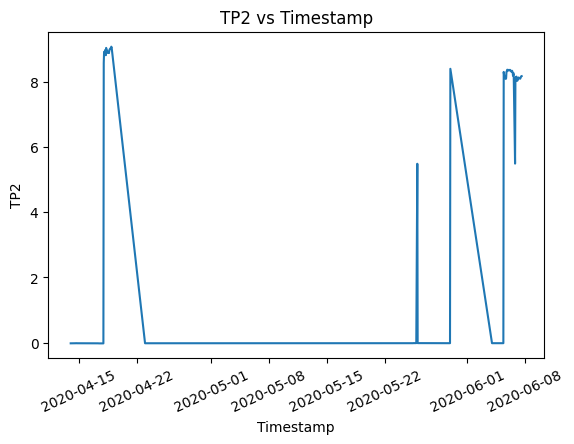

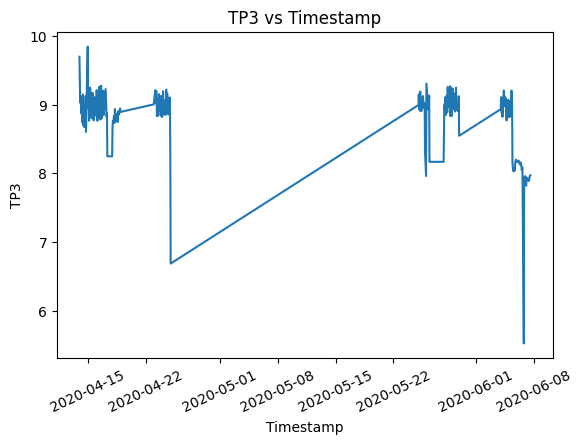

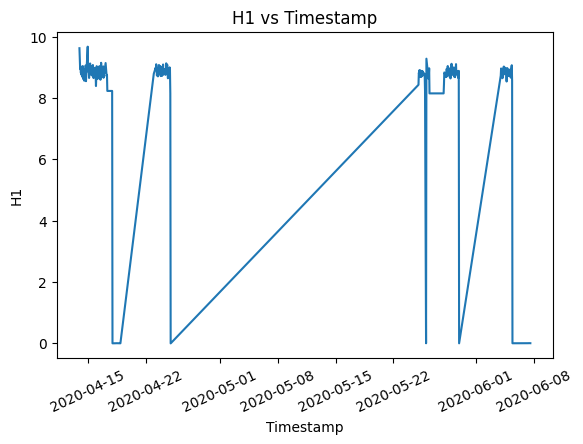

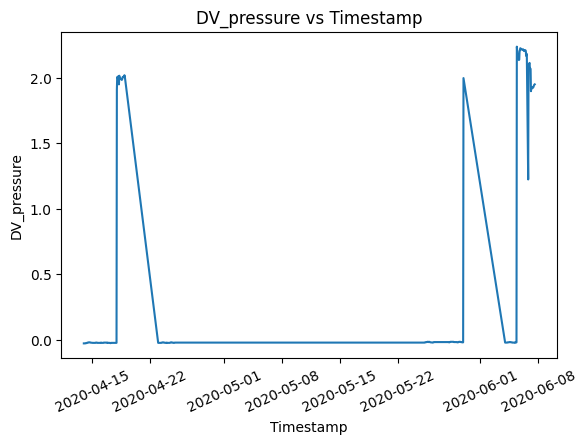

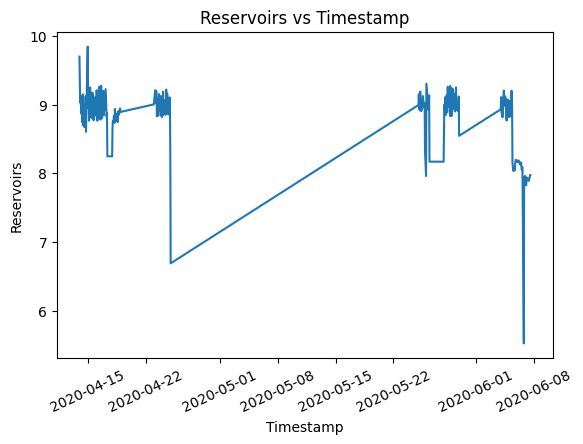

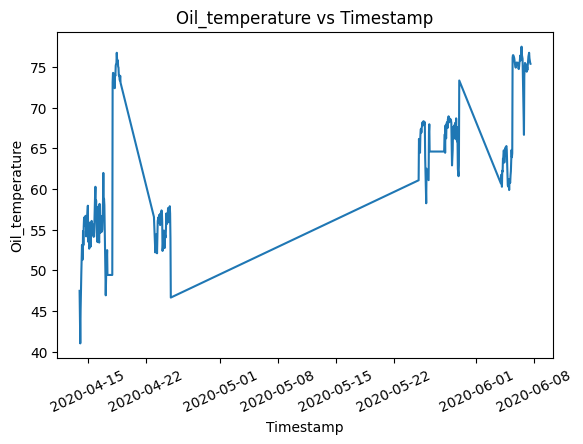

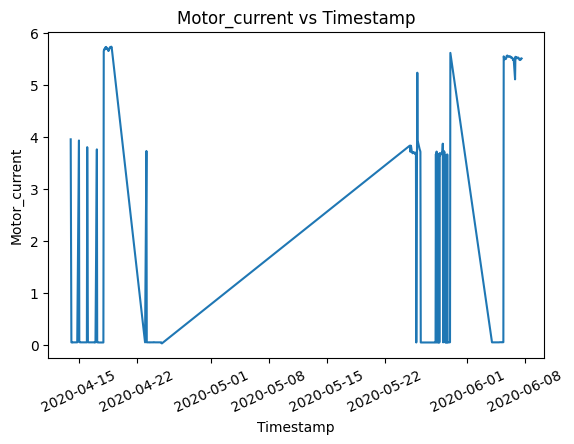

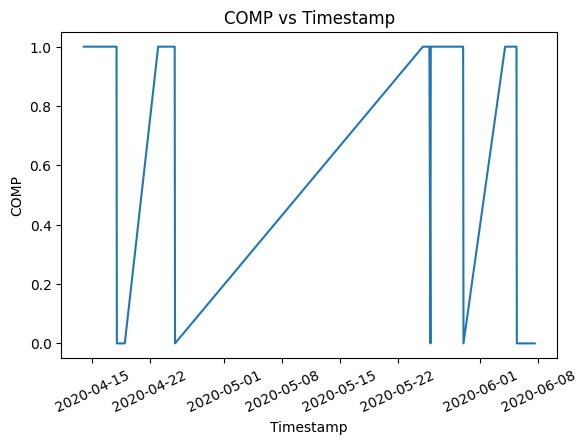

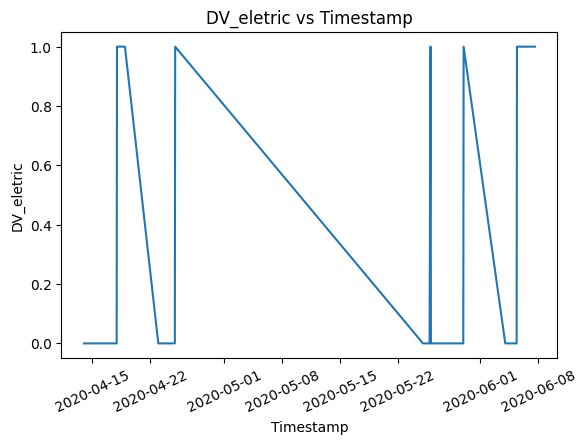

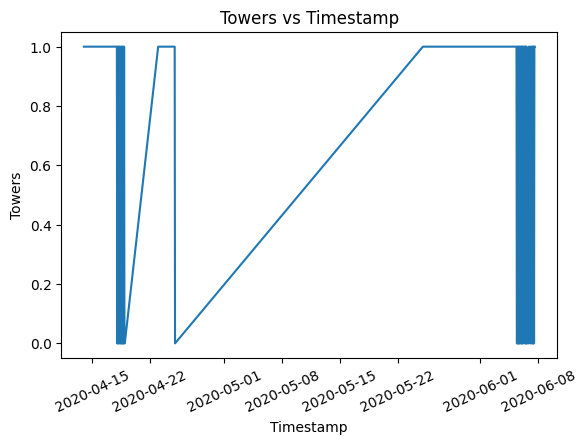

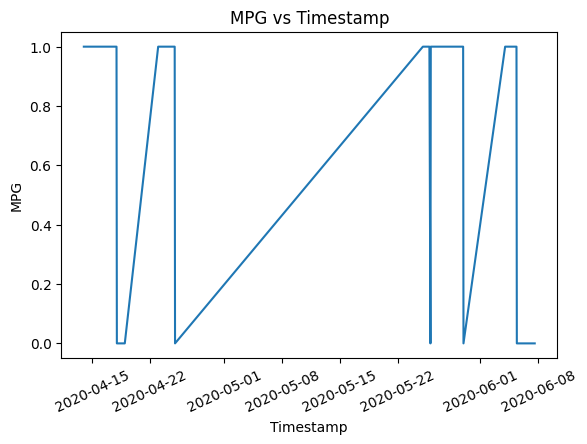

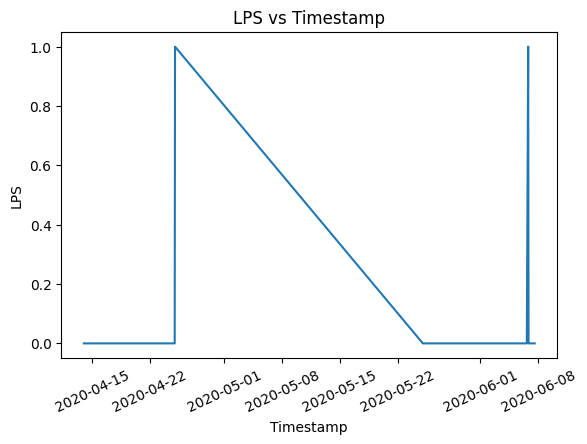

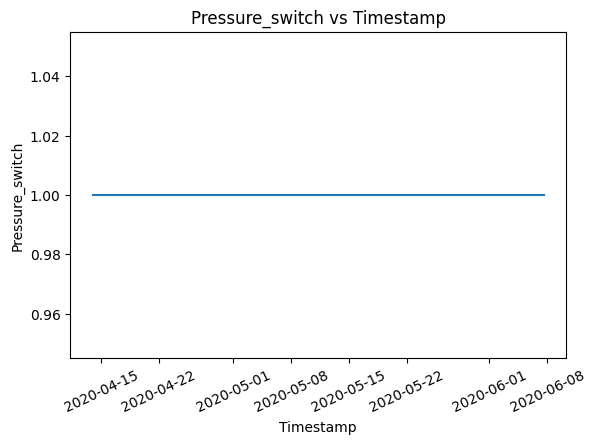

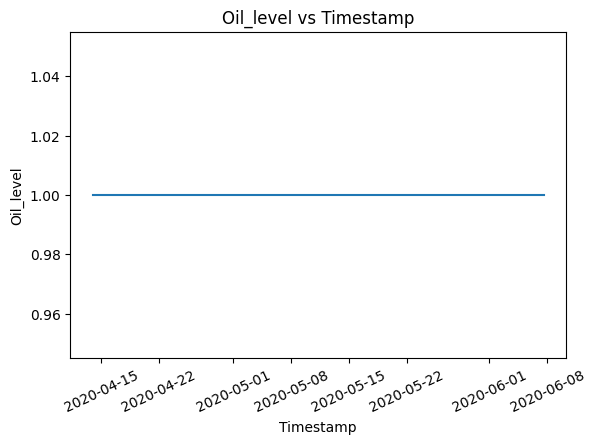

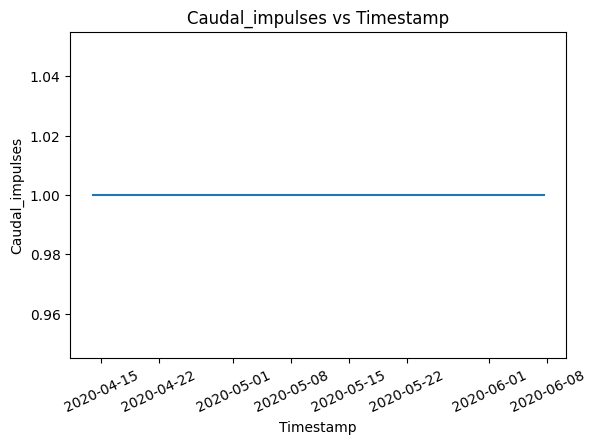

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time

# xfmt = md.DateFormatter('%Y-%m-%d %H')

for col in [i for i in train_data_plot_sorted.columns if ('timestamp' not in i and 'label' not in i)]:

# define data values

  # ax=plt.gca()
  # xfmt = md.DateFormatter('%Y-%m-%d %H')
  # ax.xaxis.set_major_formatter(xfmt)

  plt.plot(pd.to_datetime(train_data_plot_sorted['timestamp_hour']),
           train_data_plot_sorted[col] ,label='Line Chart')  # Plot the chart
  plt.xlabel("Timestamp")  # add X-axis label
  plt.ylabel(col)  # add Y-axis label
  plt.title(col +" vs Timestamp")
  plt.subplots_adjust(bottom=0.2)
  plt.xticks( rotation=25 )
  plt.show()
  # plt.savefig("./graphs/"+col+".png")

  # break

#### Line Chart Test Data

In [ ]:

test_data_plot_sorted = test_data.copy()

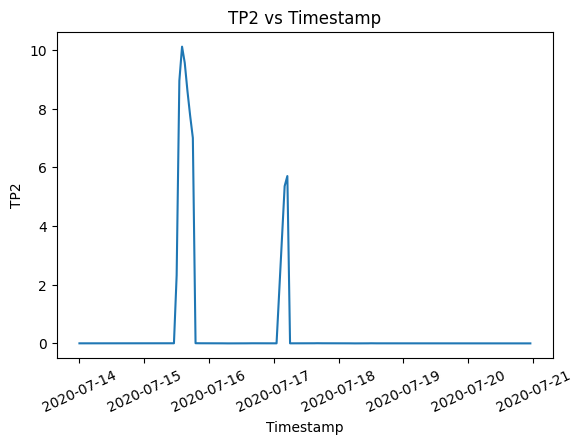

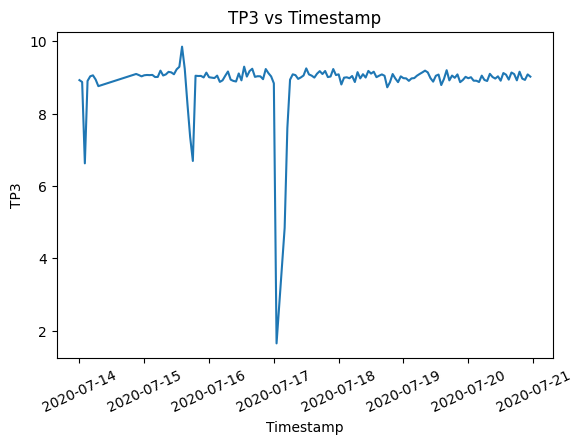

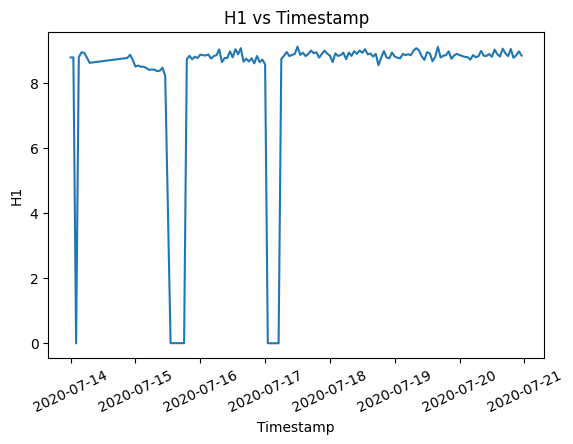

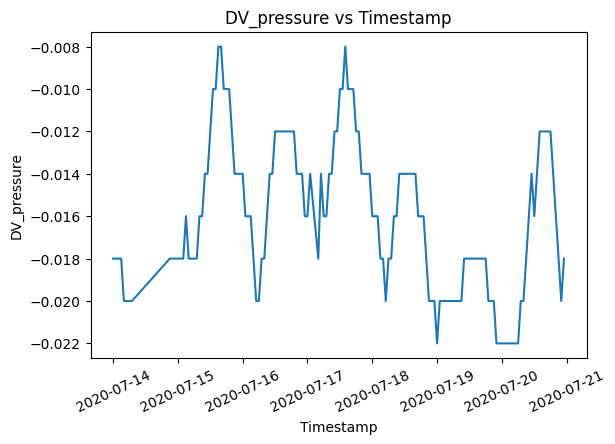

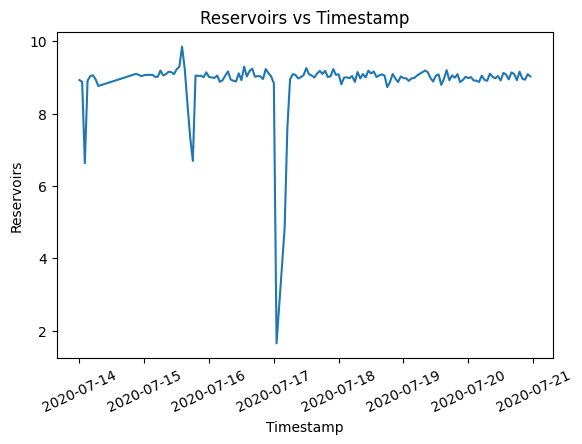

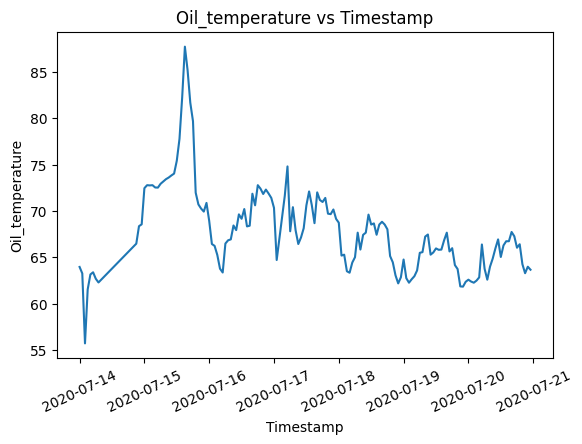

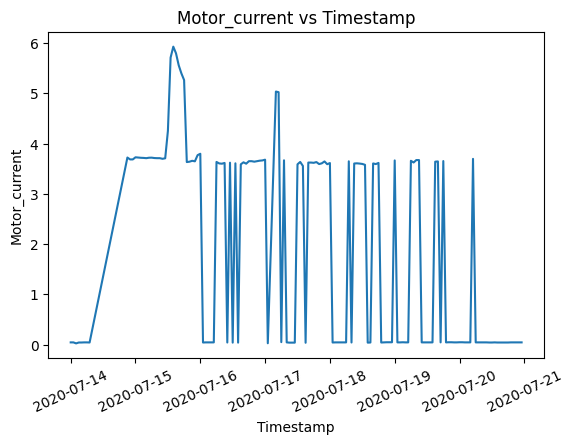

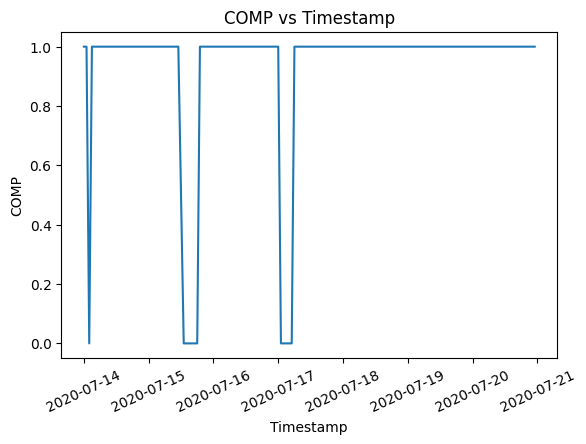

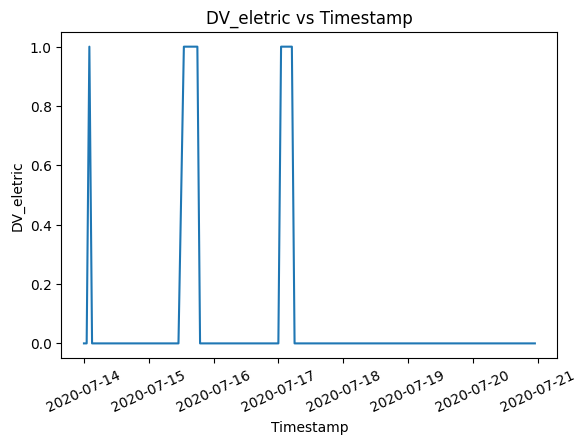

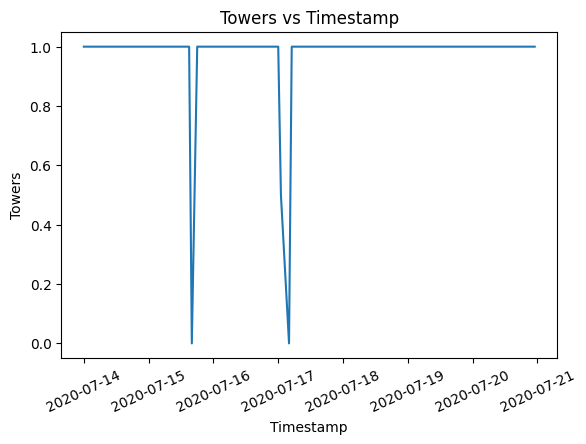

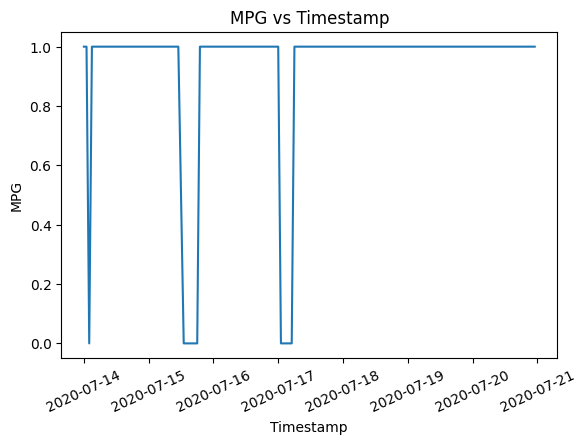

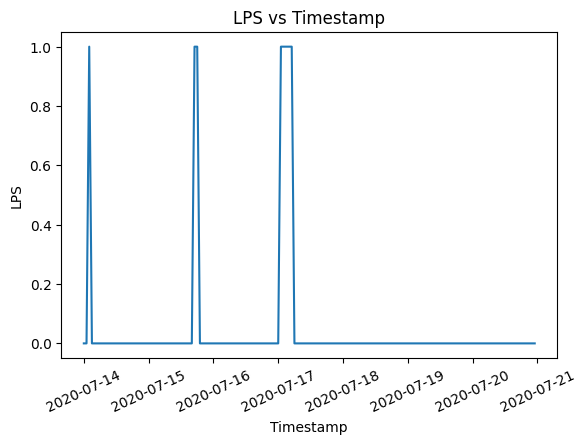

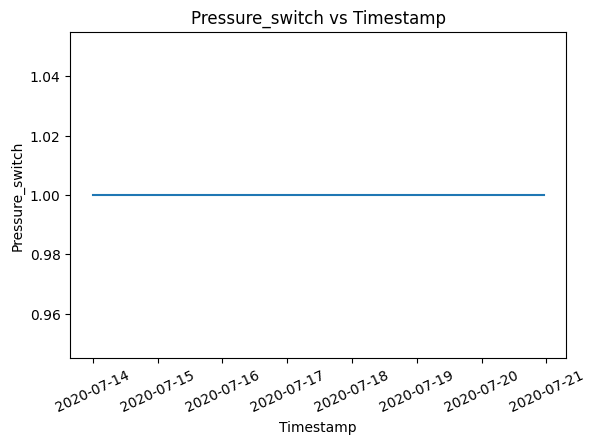

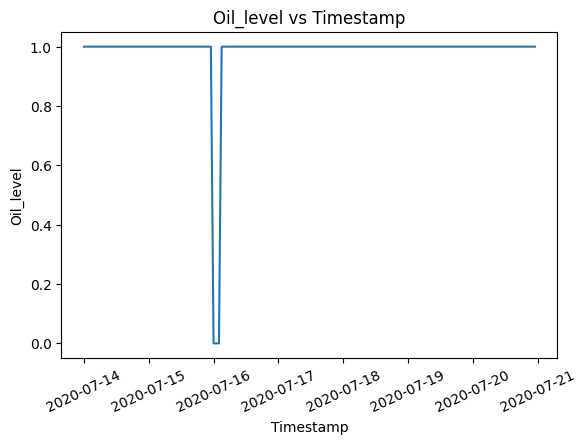

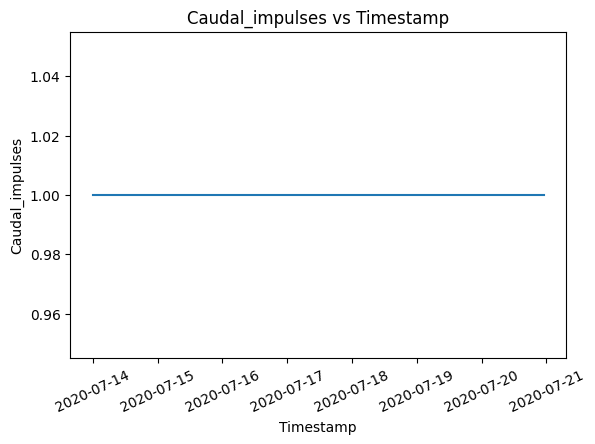

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time

# xfmt = md.DateFormatter('%Y-%m-%d %H')

for col in [i for i in test_data_plot_sorted.columns if ('timestamp' not in i and 'label' not in i)]:

# define data values

  # ax=plt.gca()
  # xfmt = md.DateFormatter('%Y-%m-%d %H')
  # ax.xaxis.set_major_formatter(xfmt)

  plt.plot(pd.to_datetime(test_data_plot_sorted['timestamp_hour']),
           test_data_plot_sorted[col] ,label='Line Chart')  # Plot the chart
  plt.xlabel("Timestamp")  # add X-axis label
  plt.ylabel(col)  # add Y-axis label
  plt.title(col +" vs Timestamp")
  plt.subplots_adjust(bottom=0.2)
  plt.xticks( rotation=25 )
  plt.show()
  # plt.savefig("./graphs/"+col+".png")

  # break